In [72]:
import pandas as pd
import numpy as np
%pylab inline

import warnings
warnings.filterwarnings("ignore")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Reading the data (may vary depending on the table used)

In [73]:
KO = pd.read_excel('231108-MINT__ko__results_peak_max.xlsx')
KO.head()

,ms_file_label,Acetoacetate,Acetyl-Threonine,Adenine,Adenosine X,Adenosine monophosphate,Alanine X,Alpha Ketoglutarate,Arabitol,Arginine,...,Trehalose,Tryptophan,Tyrosine,Uracil XF,Urate,Uridine,Urocanate,Valine,Xanthine,Xanthosine
0,KO000_Prerun_230301_HILICNeg4S_Col03_RN05409_B...,64184,17039,120425,19405,0,5877,0,0,0,...,9080,0,0,24075,0,0,70246,0,0,14671
1,KO000_Prerun_230301_HILICNeg4S_Col03_RN05411_B...,58704,30865,15946,14774,0,0,21689,0,0,...,13657,0,0,15535,0,0,27306,0,0,0
2,KO000_Prerun_230301_HILICNeg4S_Col03_RN05413_B...,11902,15827,7419,8821,0,9757,10364,0,122363,...,0,0,9591,11058,6995,0,16158,30639,0,0
3,KO000_Prerun_230301_HILICNeg4S_Col03_RN05413_B...,45882,31921,7985,9123,0,0,12842,0,0,...,19373,0,0,22849,9393,0,35264,0,0,0
4,KO000_Prerun_230301_HILICNeg4S_Col03_RN05415_K...,43110,36620,10880,9758,0,5262,11292,0,0,...,6602,0,0,17108,0,0,32862,6211,0,0


In [74]:
# metadata extraction may depend on the data, the bug, and the lab!!

def sample_type(string):
    if ('Std' in string) or ('STD' in string) or ('std' in string):
        return 'Std'
    if ('Blank' in string) or ('blank' in string):
        return 'Blank'
    if ('MHPool' in string) or ('MHPOOL' in string) or ('MHpool' in string):
        return 'MHPool'
    if ('FAEMPool' in string) or ('FAEMPool' in string) or ('FAEMPool' in string):
        return 'FAEMPool'
    
    if ('GSPool' in string) or ('GSPool' in string) or ('GSPool' in string):
        return 'GSPool'
    
    if ('KOPool' in string) or ('KOPool' in string) or ('KOPool' in string):
        return 'KOPool'
    if ('FAESPool' in string) or ('FAESPool' in string) or ('FAESPool' in string):
        return 'FAESPool'
    
    if 'ATCC_700324' in string:
        return 'ATCC1'
    
    if 'ATCC_51983' in string:
        return 'ATCC2'
    if 'BI_' in string: 
        return 'Bi'
    if 'CI_' in string:  # companion isolates
        return 'Ci'
    
    return 'Unk'

def get_organim(string):
    if ('BI_' in string) or ('CI_' in string):
        return string[:2]
    if ('MHPool' in string) or ('MHPOOL' in string) or ('MHpool' in string):
        return 'MHPool'
    return 'Unk'

def get_bi_nbr(string):
    try:
        return re.findall("BI_.{7}", string)[0]
    except:
        return 'Unk'
    
    
KO['Date'] = KO.ms_file_label.apply(lambda x: re.findall(r'_(\d{6})', x)[0])
KO['Col'] = KO.ms_file_label.apply(lambda x: 'Col'+ re.findall(r'Col(\d{2})', x)[0])
KO['SType'] = KO.ms_file_label.apply(lambda x: sample_type(x))
KO['Batch'] = KO.ms_file_label.apply(lambda x: x[:5])
KO['RN'] = KO.ms_file_label.apply(lambda x: int(re.findall(r'RN(\d{5})', x)[0]))
KO['Organism'] = KO.ms_file_label.apply(lambda x: get_organim(x))

KO['BI_NBR'] = KO.ms_file_label.apply(lambda x: get_bi_nbr(x))
KO = KO[KO.BI_NBR != 'Unk']
KO.head()

,ms_file_label,Acetoacetate,Acetyl-Threonine,Adenine,Adenosine X,Adenosine monophosphate,Alanine X,Alpha Ketoglutarate,Arabitol,Arginine,...,Valine,Xanthine,Xanthosine,Date,Col,SType,Batch,RN,Organism,BI_NBR
223,KO001_G1_T0_230302_HILICNeg4S_Col03_RN05528_A0...,39060,2675782,47510,11935,7033,366613,3634335,45516,11991652,...,1028609,0,0,230302,Col03,Bi,KO001,5528,KO,BI_06_0553
224,KO001_G1_T0_230302_HILICNeg4S_Col03_RN05529_A0...,38173,2878078,58831,0,0,281661,3611649,45377,12818216,...,948646,0,19366,230302,Col03,Bi,KO001,5529,KO,BI_06_0852
225,KO001_G1_T0_230302_HILICNeg4S_Col03_RN05530_A0...,35344,2918209,49842,0,0,298876,3520080,75269,11804054,...,833570,0,20224,230302,Col03,Bi,KO001,5530,KO,BI_06_0889
226,KO001_G1_T0_230302_HILICNeg4S_Col03_RN05531_A0...,44497,2521250,83371,0,0,290444,2222536,41769,12054876,...,853828,0,0,230302,Col03,Bi,KO001,5531,KO,BI_06_1231
227,KO001_G1_T0_230302_HILICNeg4S_Col03_RN05532_A0...,37005,2324575,62666,36956,0,326865,2063523,38574,12664039,...,1038668,9268,0,230302,Col03,Bi,KO001,5532,KO,BI_06_1249


In [75]:
# checking collection date, this step is very specific for this project

dates = pd.read_csv('../231110_BINBR_and_Collection.csv')
dates.head()

,BI_NBR,COLLECT_DTM
0,BI_06_0500,2005-12-30 22:34:00
1,BI_06_0502,2005-12-31 00:39:00
2,BI_06_0503,2006-01-01 21:10:00
3,BI_06_0504,2006-01-01 18:40:00
4,BI_06_0506,2005-12-31 08:27:00


In [76]:
KO['COLLECT_DTM'] = 'Unk'
for binbr in np.unique(KO.BI_NBR):
    try:
        KO.loc[KO.BI_NBR == binbr,'COLLECT_DTM'] = dates.COLLECT_DTM[dates.BI_NBR == binbr].iloc[0]
    except:
        continue
KO.sort_values(by = ['COLLECT_DTM'], inplace = True)
KO['YEAR'] = KO.COLLECT_DTM.apply(lambda x: x[:4])
KO.head()

,ms_file_label,Acetoacetate,Acetyl-Threonine,Adenine,Adenosine X,Adenosine monophosphate,Alanine X,Alpha Ketoglutarate,Arabitol,Arginine,...,Xanthosine,Date,Col,SType,Batch,RN,Organism,BI_NBR,COLLECT_DTM,YEAR
223,KO001_G1_T0_230302_HILICNeg4S_Col03_RN05528_A0...,39060,2675782,47510,11935,7033,366613,3634335,45516,11991652,...,0,230302,Col03,Bi,KO001,5528,KO,BI_06_0553,2006-01-08 04:52:00,2006
224,KO001_G1_T0_230302_HILICNeg4S_Col03_RN05529_A0...,38173,2878078,58831,0,0,281661,3611649,45377,12818216,...,19366,230302,Col03,Bi,KO001,5529,KO,BI_06_0852,2006-03-01 12:20:00,2006
225,KO001_G1_T0_230302_HILICNeg4S_Col03_RN05530_A0...,35344,2918209,49842,0,0,298876,3520080,75269,11804054,...,20224,230302,Col03,Bi,KO001,5530,KO,BI_06_0889,2006-03-02 23:30:00,2006
226,KO001_G1_T0_230302_HILICNeg4S_Col03_RN05531_A0...,44497,2521250,83371,0,0,290444,2222536,41769,12054876,...,0,230302,Col03,Bi,KO001,5531,KO,BI_06_1231,2006-05-05 02:00:00,2006
227,KO001_G1_T0_230302_HILICNeg4S_Col03_RN05532_A0...,37005,2324575,62666,36956,0,326865,2063523,38574,12664039,...,0,230302,Col03,Bi,KO001,5532,KO,BI_06_1249,2006-05-05 21:15:00,2006


Acetoacetate


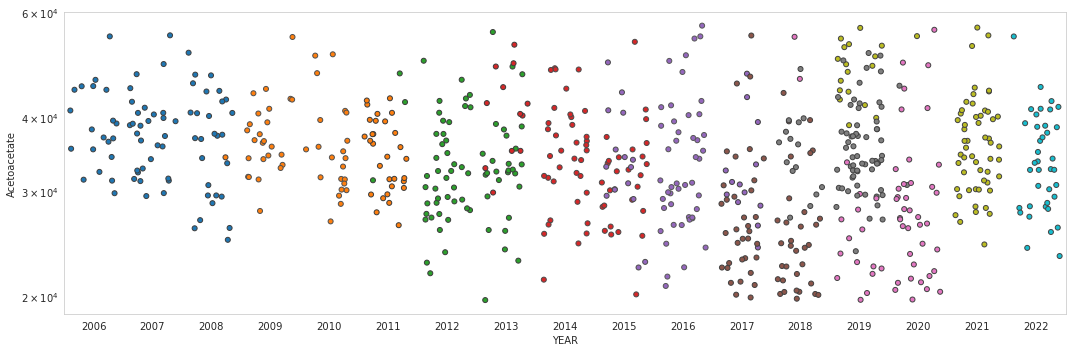

Acetyl-Threonine


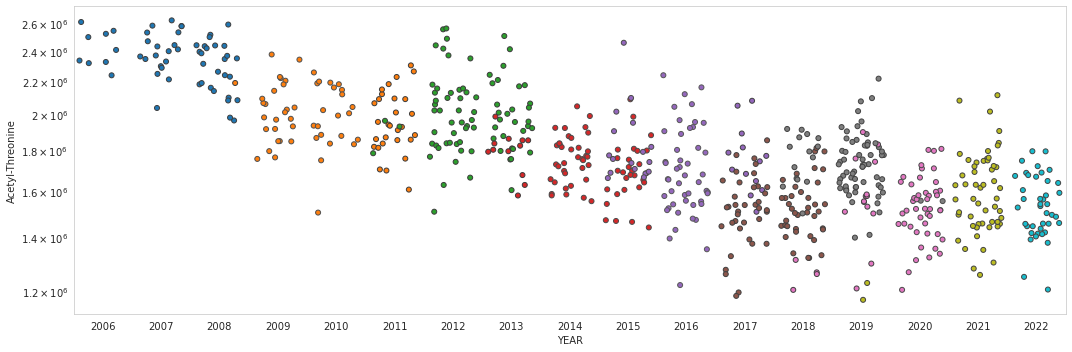

In [77]:
# this code is used to filter out compounds with very bad signal or marked batch effect

# selected_metabs = KO.columns[1:-10]

selected_metabs = ['Acetoacetate', 'Acetyl-Threonine', 'Adenine', 'Adenosine X',
       'Alpha Ketoglutarate',
       'Arabitol', 'Arginine', 'Ascorbate', 'Asparagine', 'Aspartate',
       'Biotin', 'Carnosine', 'Citrulline', 'Cystine', 'Cytidine', 'Dihydroorotate', 'Fumarate', 'Glucose',
       'Glucose-6-Phosphate', 'Glutamate', 'Glutamine',
       'Hippurate', 'Histidine', 
       'Hypoxanthine', 'Inosine', 'Isoleucine X', 'Itaconate', 'Leucine',
       'Lysine', 'Methionine', 'Methionine Sulfoxide', 'Mevalonate acid',
       'Myoinositol X', 'N-Acetyl-Aspartate', 'N-Acetyl-Glucosamine',
       'N-Acetyl-Glutamate', 'N-Acetyl-Glutamine', 'N-Acetyl-Glycine',
       'N-Acetyl-Leucine', 'N-Acetyl-Methionine', 'N-Acetyl-Phenylalanine',
       'Nicotinate', 'O-Phospho-L-Serine', 'Ornithine X', 'Orotate',
       'Panthothenic acid', 'Phenylalanine X', 'Proline X', 'Pyridoxine X',
       'Rhamnose', 'Riboflavin', 'Serine', 'Shikimate', 'Succinate', 
       'Threonine', 'Thymidine', 'Thymine', 'Trehalose', 'Tryptophan',
       'Tyrosine', 'Uracil XF', 'Urate', 'Uridine', 'Urocanate', 'Valine',
       'Xanthosine']

import seaborn as sns
from scipy import stats

# to save space, this loop only shows the first two values. In order to filter out compounds it should be run for all of them
for metab in selected_metabs[:2]:
    print(metab)
    sns.set_style("whitegrid")
    fig = plt.figure(figsize=(15,5))
    dat = KO[np.abs(stats.zscore(log(KO[metab] + 0.01))) < 2]
    if(len(dat[dat[metab] > 0]) > .1*len(dat)):
        
        ax = sns.stripplot(y=metab, x='YEAR', data=dat, hue = 'Batch', linewidth=1, jitter = 0.4, legend = False)
        ax.grid(False)
        plt.yscale('log')
        plt.tight_layout()
        plt.show()

In [78]:
for compound in KO.columns[1:-10]:
    if compound not in selected_metabs:
        KO = KO.drop([compound], axis=1)

In [79]:
# scaling with durbin transformation


def durbin(x, c = 1):
    return log((x + sqrt(x**2 + c**2)) / 2 )

cc_value = KO.copy()
cc_value.fillna(0.000001)

for metab in selected_metabs:
    cc_value[metab] = cc_value[metab].apply(lambda x: durbin(x))
    
cc_value.head()

,ms_file_label,Acetoacetate,Acetyl-Threonine,Adenine,Adenosine X,Alpha Ketoglutarate,Arabitol,Arginine,Ascorbate,Asparagine,...,Xanthosine,Date,Col,SType,Batch,RN,Organism,BI_NBR,COLLECT_DTM,YEAR
223,KO001_G1_T0_230302_HILICNeg4S_Col03_RN05528_A0...,10.572854,14.799752,10.768695,9.387231,15.105937,10.725819,16.299721,11.899792,12.956032,...,-0.693147,230302,Col03,Bi,KO001,5528,KO,BI_06_0553,2006-01-08 04:52:00,2006
224,KO001_G1_T0_230302_HILICNeg4S_Col03_RN05529_A0...,10.549884,14.872633,10.982424,-0.693147,15.099675,10.722761,16.366378,12.102222,11.780652,...,9.871274,230302,Col03,Bi,KO001,5529,KO,BI_06_0852,2006-03-01 12:20:00,2006
225,KO001_G1_T0_230302_HILICNeg4S_Col03_RN05530_A0...,10.472884,14.886481,10.816613,-0.693147,15.073994,11.228824,16.283954,12.026623,11.908037,...,9.914625,230302,Col03,Bi,KO001,5530,KO,BI_06_0889,2006-03-02 23:30:00,2006
226,KO001_G1_T0_230302_HILICNeg4S_Col03_RN05531_A0...,10.703177,14.740265,11.331056,-0.693147,14.614159,10.639910,16.304980,12.075497,12.380694,...,-0.693147,230302,Col03,Bi,KO001,5531,KO,BI_06_1231,2006-05-05 02:00:00,2006
227,KO001_G1_T0_230302_HILICNeg4S_Col03_RN05532_A0...,10.518808,14.659048,11.045574,10.517483,14.539925,10.560334,16.354277,11.841488,11.965064,...,-0.693147,230302,Col03,Bi,KO001,5532,KO,BI_06_1249,2006-05-05 21:15:00,2006


In [80]:
# pip install pca
import numpy as np
import pandas as pd
from pca import pca


X = cc_value[selected_metabs]
# for col in X.columns:
#     X[col] = np.log(X[col] + np.mean(X[col])/10000)
# Initialize
model = pca(n_components=5)
# Fit transform
out = model.fit_transform(X)

# Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [66] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
     PC               feature   loading  type
0   PC1           Adenosine X  0.612513  best
1   PC2          Pyridoxine X -0.606759  best
2   PC3  N-Acetyl-Glucosamine  0.934398  best
3   PC4            Xanthosine  0.642115  best
4   PC5          Pyridoxine X -0.487080  best
..  ...                   ...       ...   ...
62  PC1             Uracil XF -0.016571  weak
63  PC4                 Urate -0.358473  weak
64  PC1               Uridine  0.093906  weak
65  PC1             Urocanate -0.073463  weak
66  PC1      

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


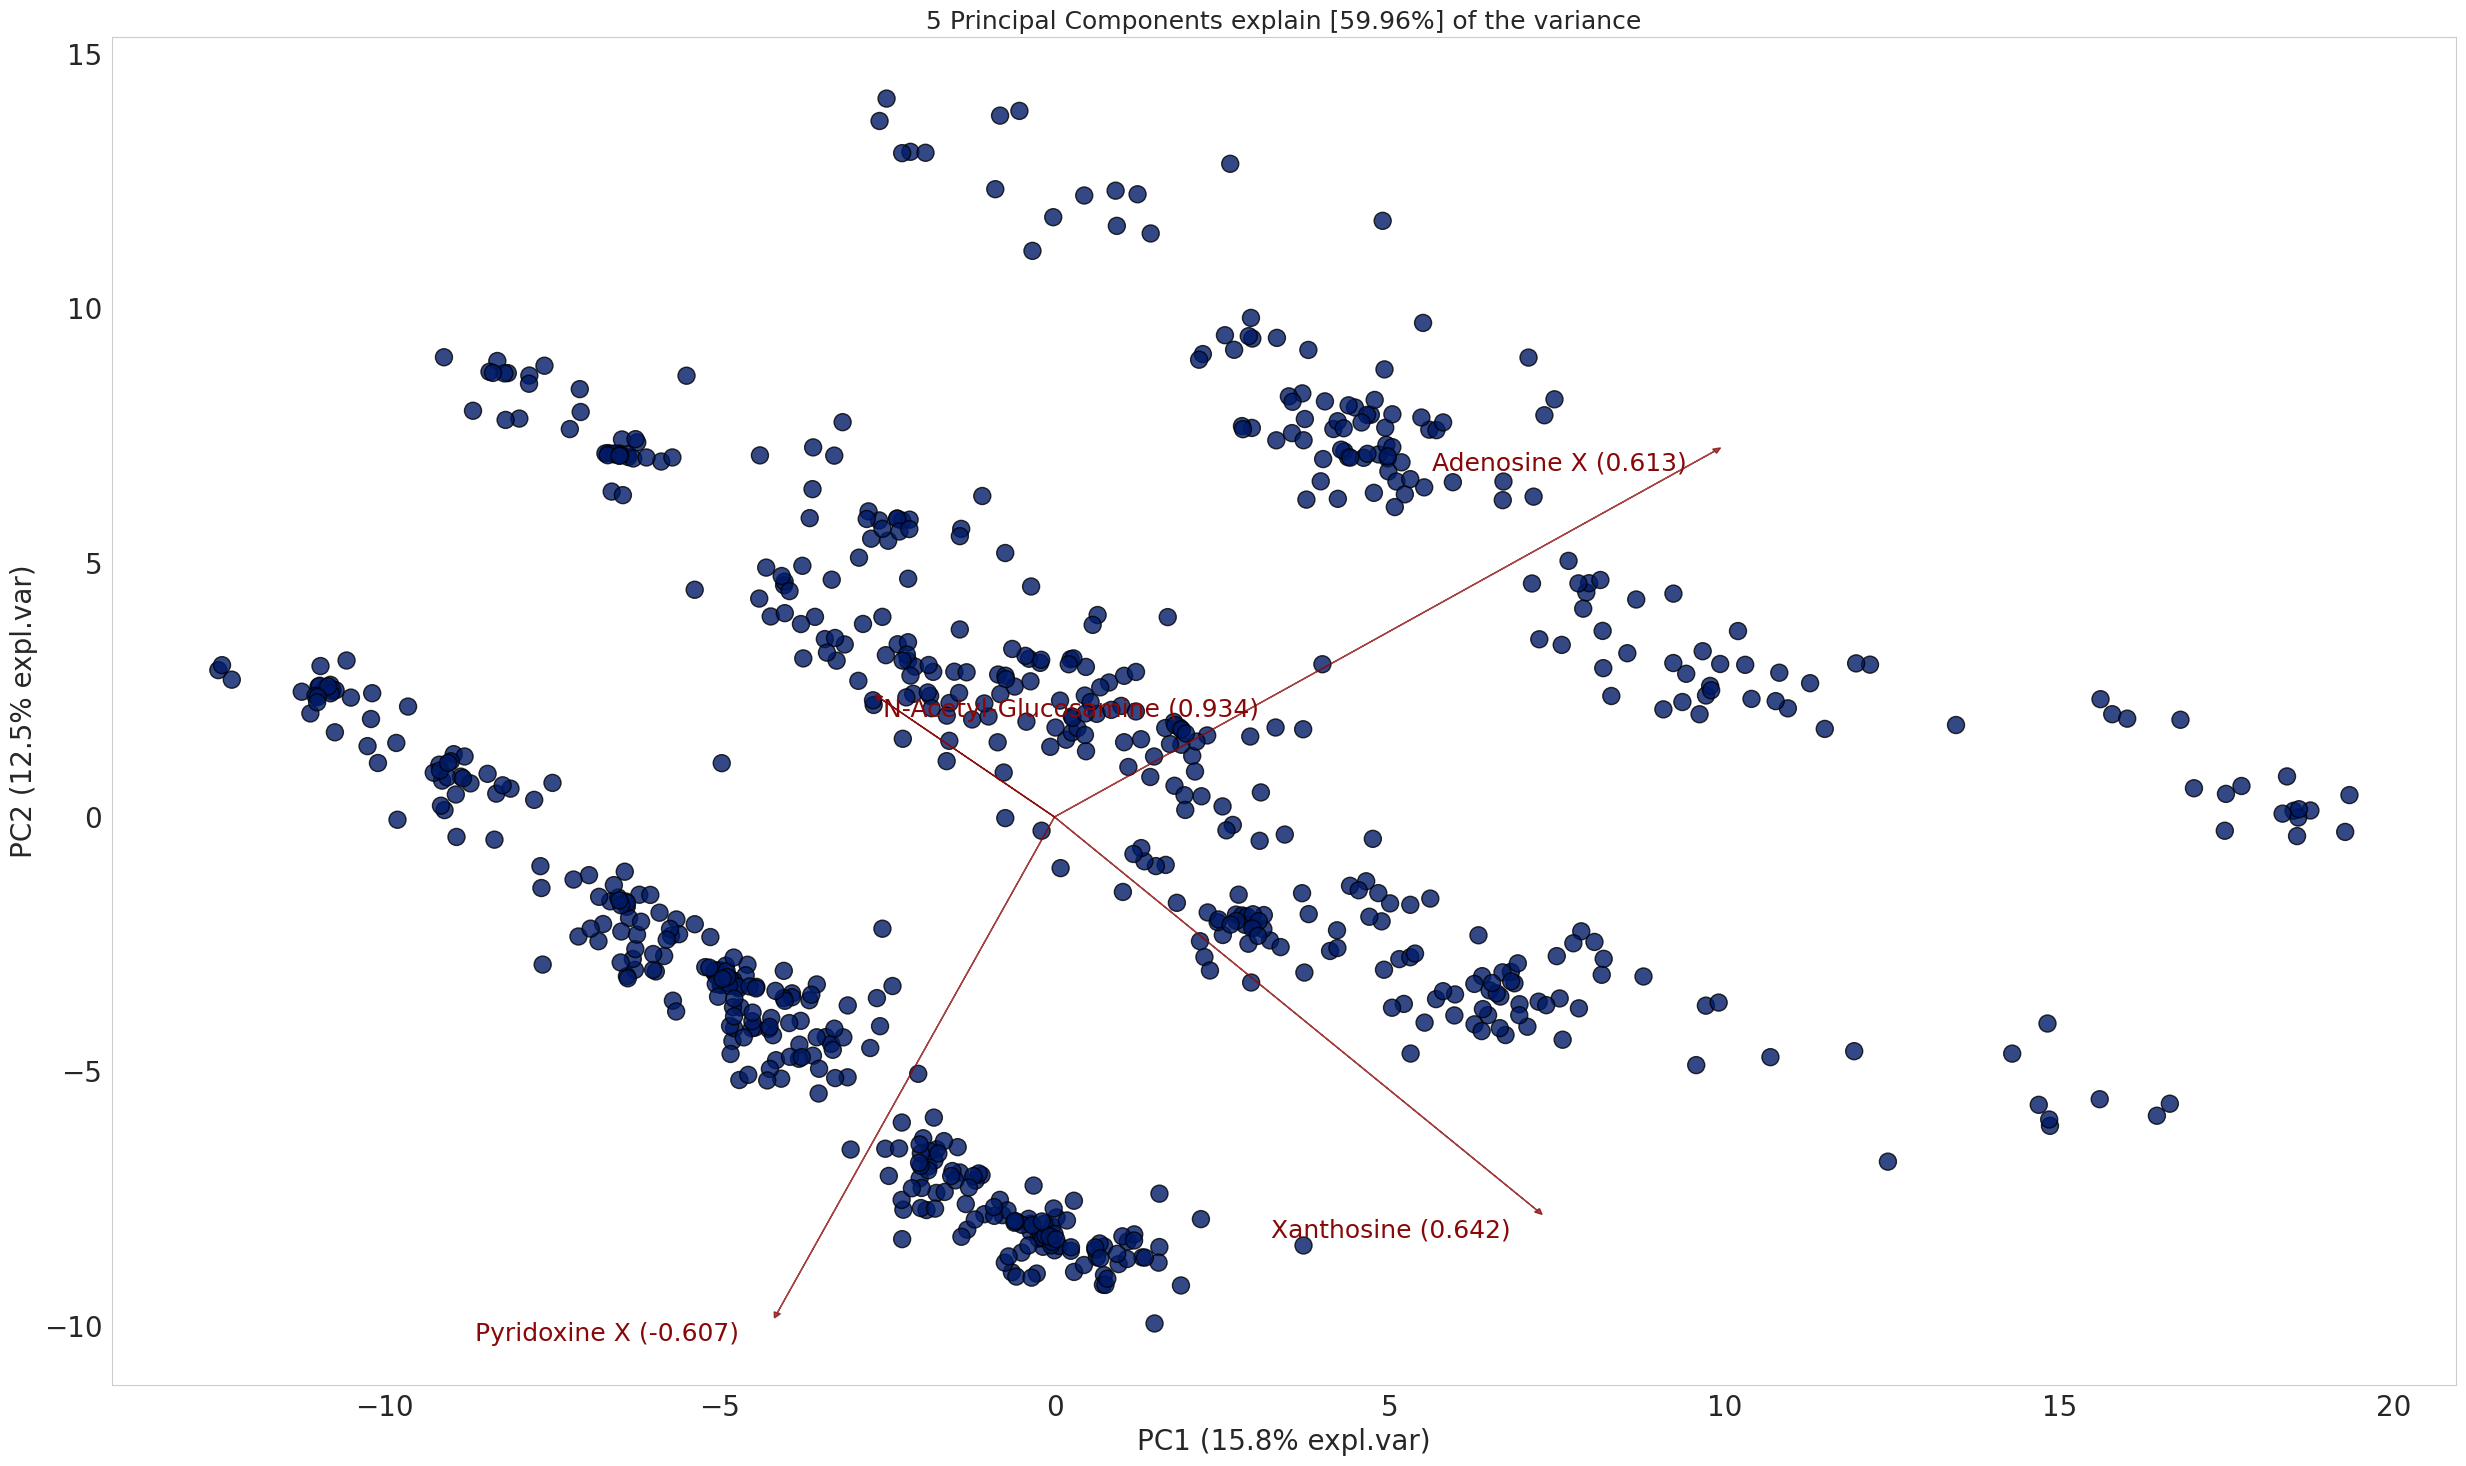

In [81]:
# Create a biplot
fig, ax = model.biplot(n_feat=4)
plt.grid(False)
plt.tight_layout()
plt.savefig('biplot.png', dpi = 700)
plt.show()

# relationship with outcome

In [82]:
# this section is very particular of LSARP proyect


outcome = pd.read_csv('../230809-AW__Outcomes_and_SeverityScores.csv')
outcome.head()

,BI_NBR,APL: PID,APL: ORG_LONG_NAME,APL: ORG_GROUP_SHORT,APL: COLLECT_DTM,APL: index,APL: HOSPITAL_ONSET_48,AHS: ENCNTR_ADMIT_DATE,AHS: GENDER,AHS: NAGE_YR,...,OUTCOME: C.DIFFICLE_INFECTION,COMORB: COMORB_LVL,COMORB: Charlson_WIC,COMORB: vW_Elixhauser,S.SCORE: qPBS,S.SCORE: PBS,S.SCORE: CURB65,S.SCORE: SOFA,S.SCORE: LODS,S.SCORE: OSF
0,BI_08_0703,94,Escherichia coli,E. coli,2008-02-26,True,False,2008-02-26,F,58,...,False,1.0,0,0,0,0,0,0,0,0
1,BI_09_1422,98,Enterococcus faecalis,E. faecalis,2009-06-09,True,True,2009-05-15,F,77,...,False,4.0,11,29,0,0,1,0,0,1
2,BI_06_1463,107,Escherichia coli,E. coli,2006-06-10,True,False,2006-06-10,M,90,...,False,0.0,4,20,0,0,1,0,0,0
3,BI_08_1353,135,Escherichia coli,E. coli,2008-06-16,True,False,NaN,M,60,...,False,NaN,0,0,0,0,0,0,0,0
4,BI_08_1546,314,Coagulase negative Staphylococcus,CNS,2008-07-15,True,True,2008-06-24,F,78,...,False,2.0,2,3,0,0,1,0,0,1


In [83]:
outcome['OUTCOME: ThirtyDay_Death'] = outcome['OUTCOME: ThirtyDay_Death'].apply(lambda x: str(x))
outcome['OUTCOME: ThreeMo_Death'] = outcome['OUTCOME: ThreeMo_Death'].apply(lambda x: str(x))

KO['30D_death'] = 'unk'
KO['3M_death'] = 'unk'
unknown_output = []
unknown_output1 = []
for binbr in KO.BI_NBR:
    try:
        KO.loc[KO.BI_NBR == binbr,'30D_death' ] = outcome['OUTCOME: ThirtyDay_Death'][outcome.BI_NBR == binbr].iloc[0]
    except:
#         print(binbr)
        unknown_output.append(binbr)
    
    try:
        KO.loc[KO.BI_NBR == binbr,'3M_death' ] = outcome['OUTCOME: ThreeMo_Death'][outcome.BI_NBR == binbr].iloc[0]
    except:
#         print(binbr)
        unknown_output1.append(binbr)

KO_f1 = KO[(KO['30D_death'] == 'True') | (KO['30D_death'] == 'False')]
KO_f2 = KO[(KO['3M_death'] == 'True') | (KO['3M_death'] == 'False')]

KO.loc[KO['30D_death'] == 'nan','30D_death'] = 'unk'
KO.loc[KO['3M_death'] == 'nan','3M_death'] = 'unk'

In [84]:
def durbin(x, c = 1):
    return log((x + sqrt(x**2 + c**2)) / 2 )

cc_value = KO.copy()
cc_value.fillna(0.000001)

for metab in selected_metabs:
    cc_value[metab] = cc_value[metab].apply(lambda x: durbin(x, c = 1))
    
cc_value.head()

# pip install pca
import numpy as np
import pandas as pd
from pca import pca


X = cc_value[selected_metabs]
Y = cc_value['30D_death']
# for col in X.columns:
#     X[col] = np.log(X[col] + np.mean(X[col])/10000)
# Initialize
model = pca(n_components=3)
# Fit transform
out = model.fit_transform(X,  row_labels=Y)


[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [66] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


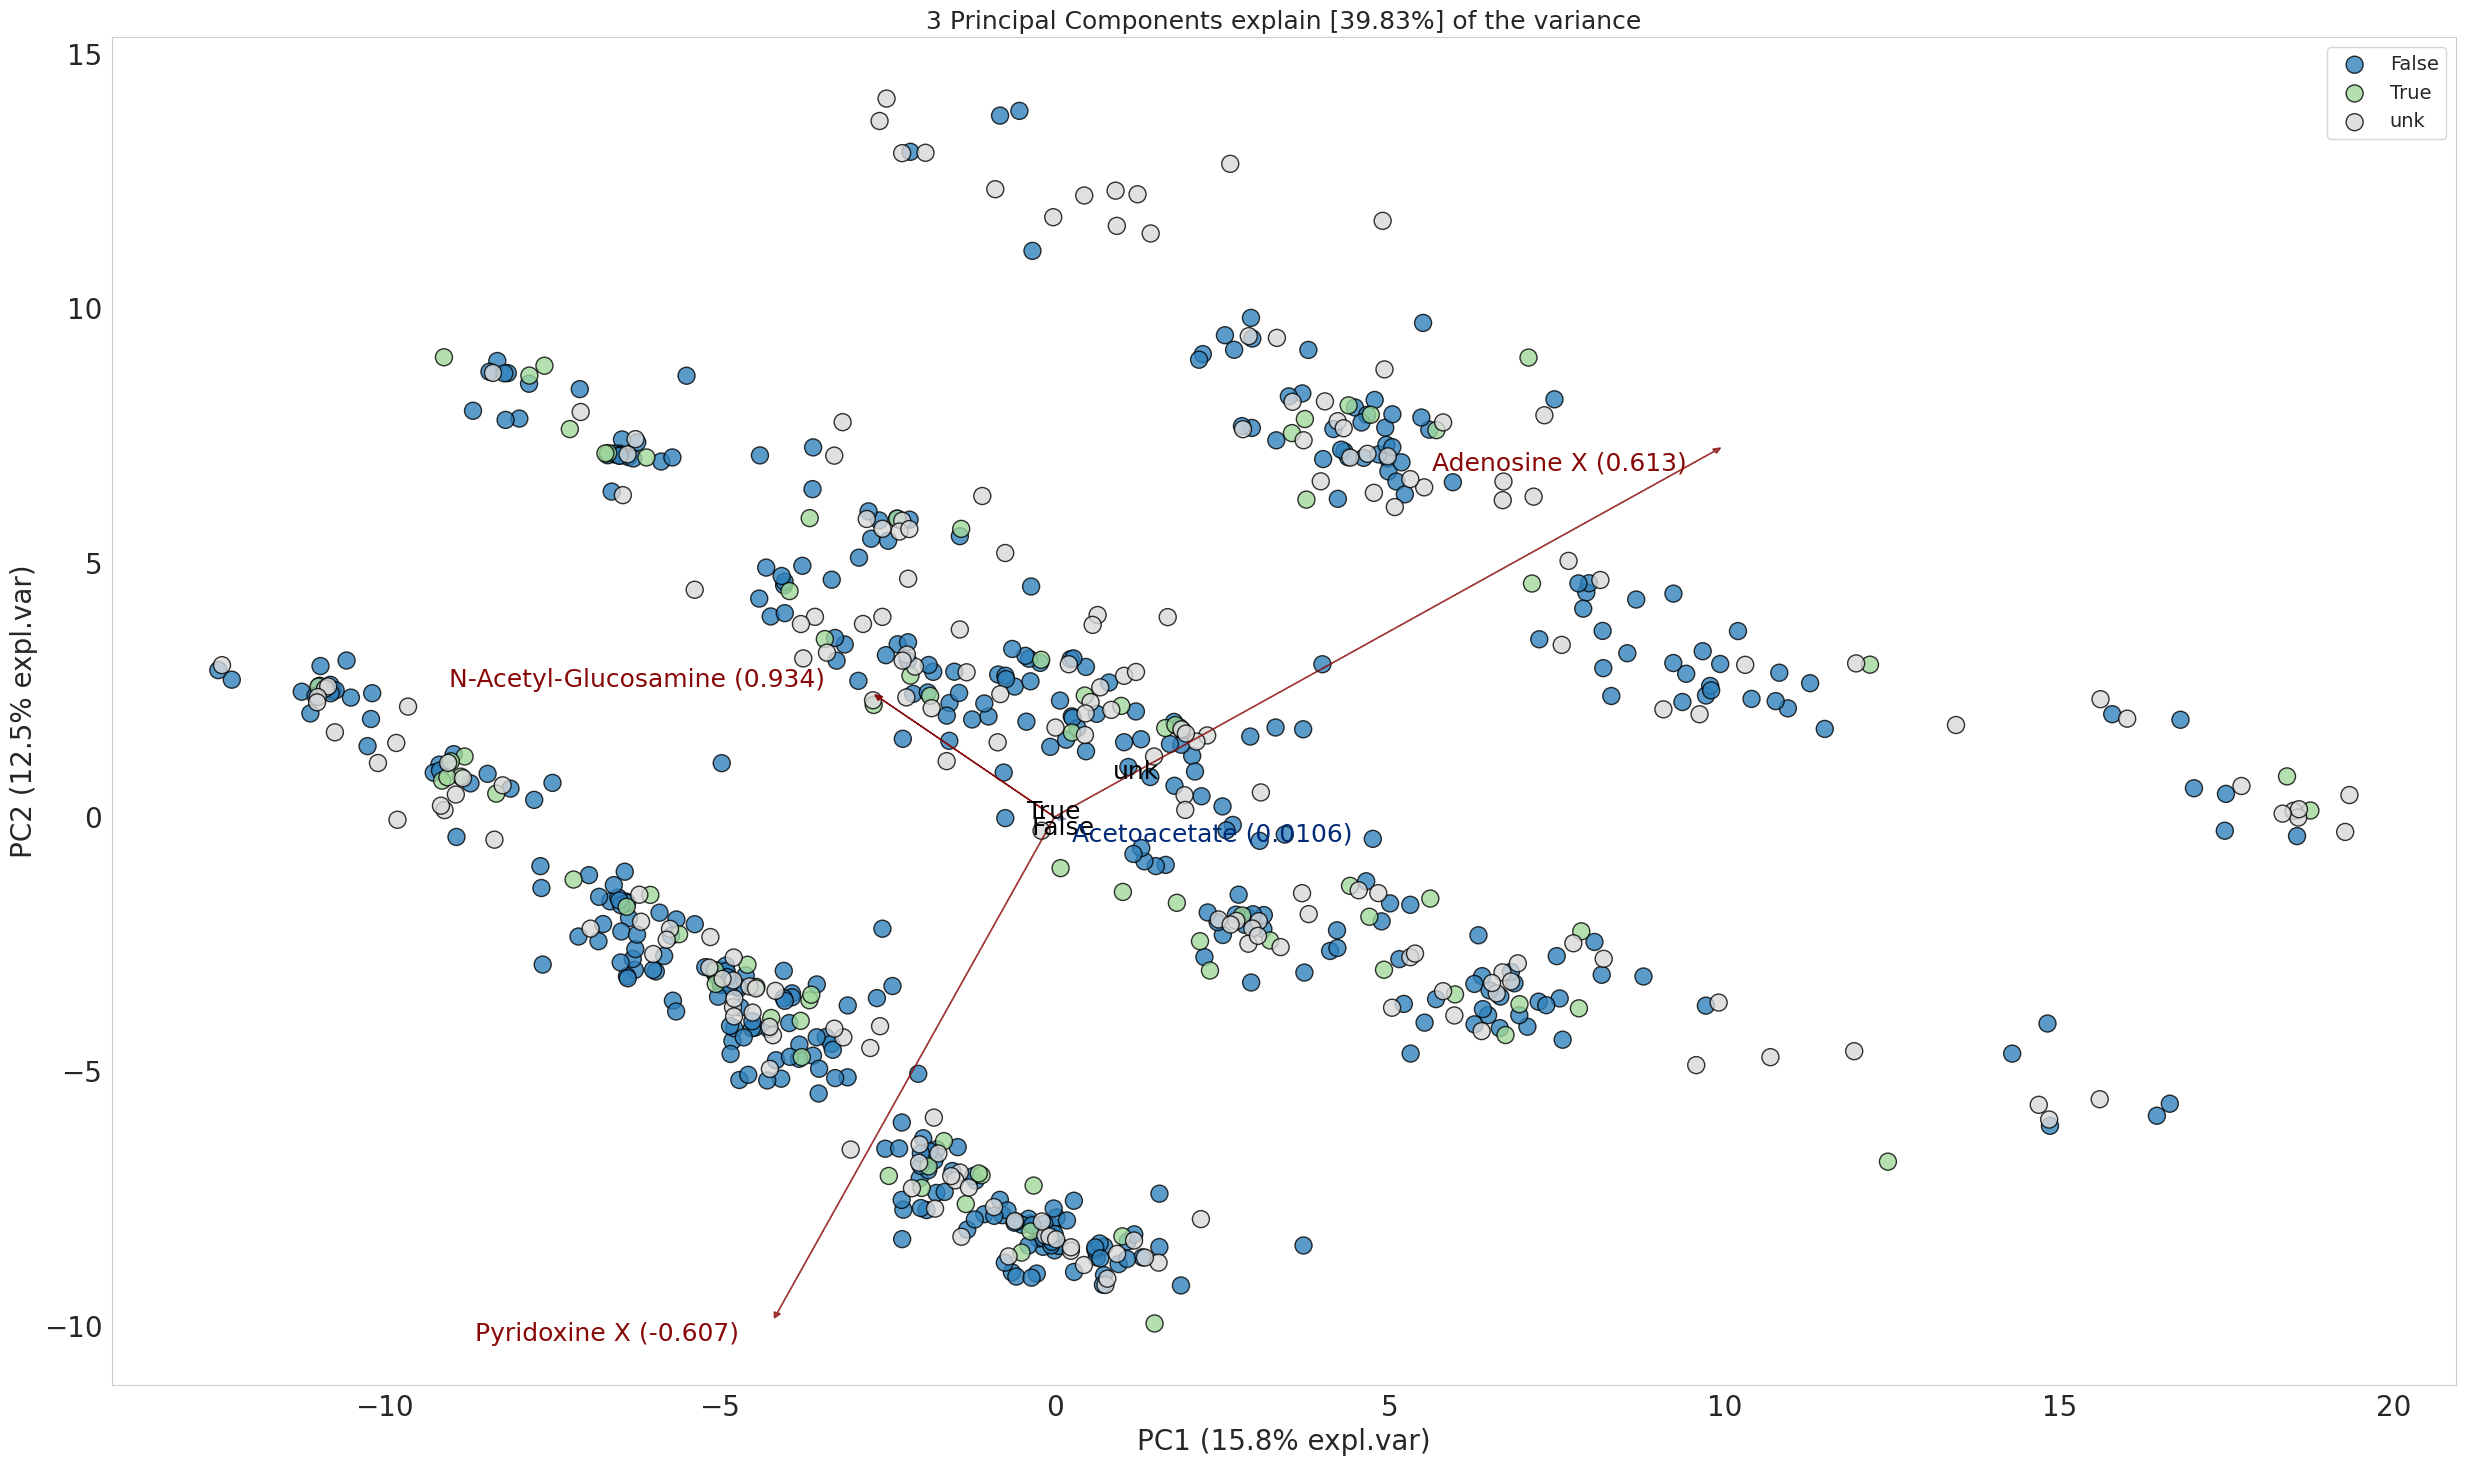

In [85]:
# Create a biplot
fig, ax = model.biplot(n_feat=4)
plt.grid(False)
plt.tight_layout()
plt.savefig('biplot with output.png', dpi = 700)
plt.show()

In [ ]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=0).fit(out['PC'][['PC1','PC2']])

X = cc_value[selected_metabs]
Y = cc_value['30D_death']
# for col in X.columns:
#     X[col] = np.log(X[col] + np.mean(X[col])/10000)
# Initialize
model = pca(n_components=5)
# Fit transform
out = model.fit_transform(X,  row_labels=clustering.labels_)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


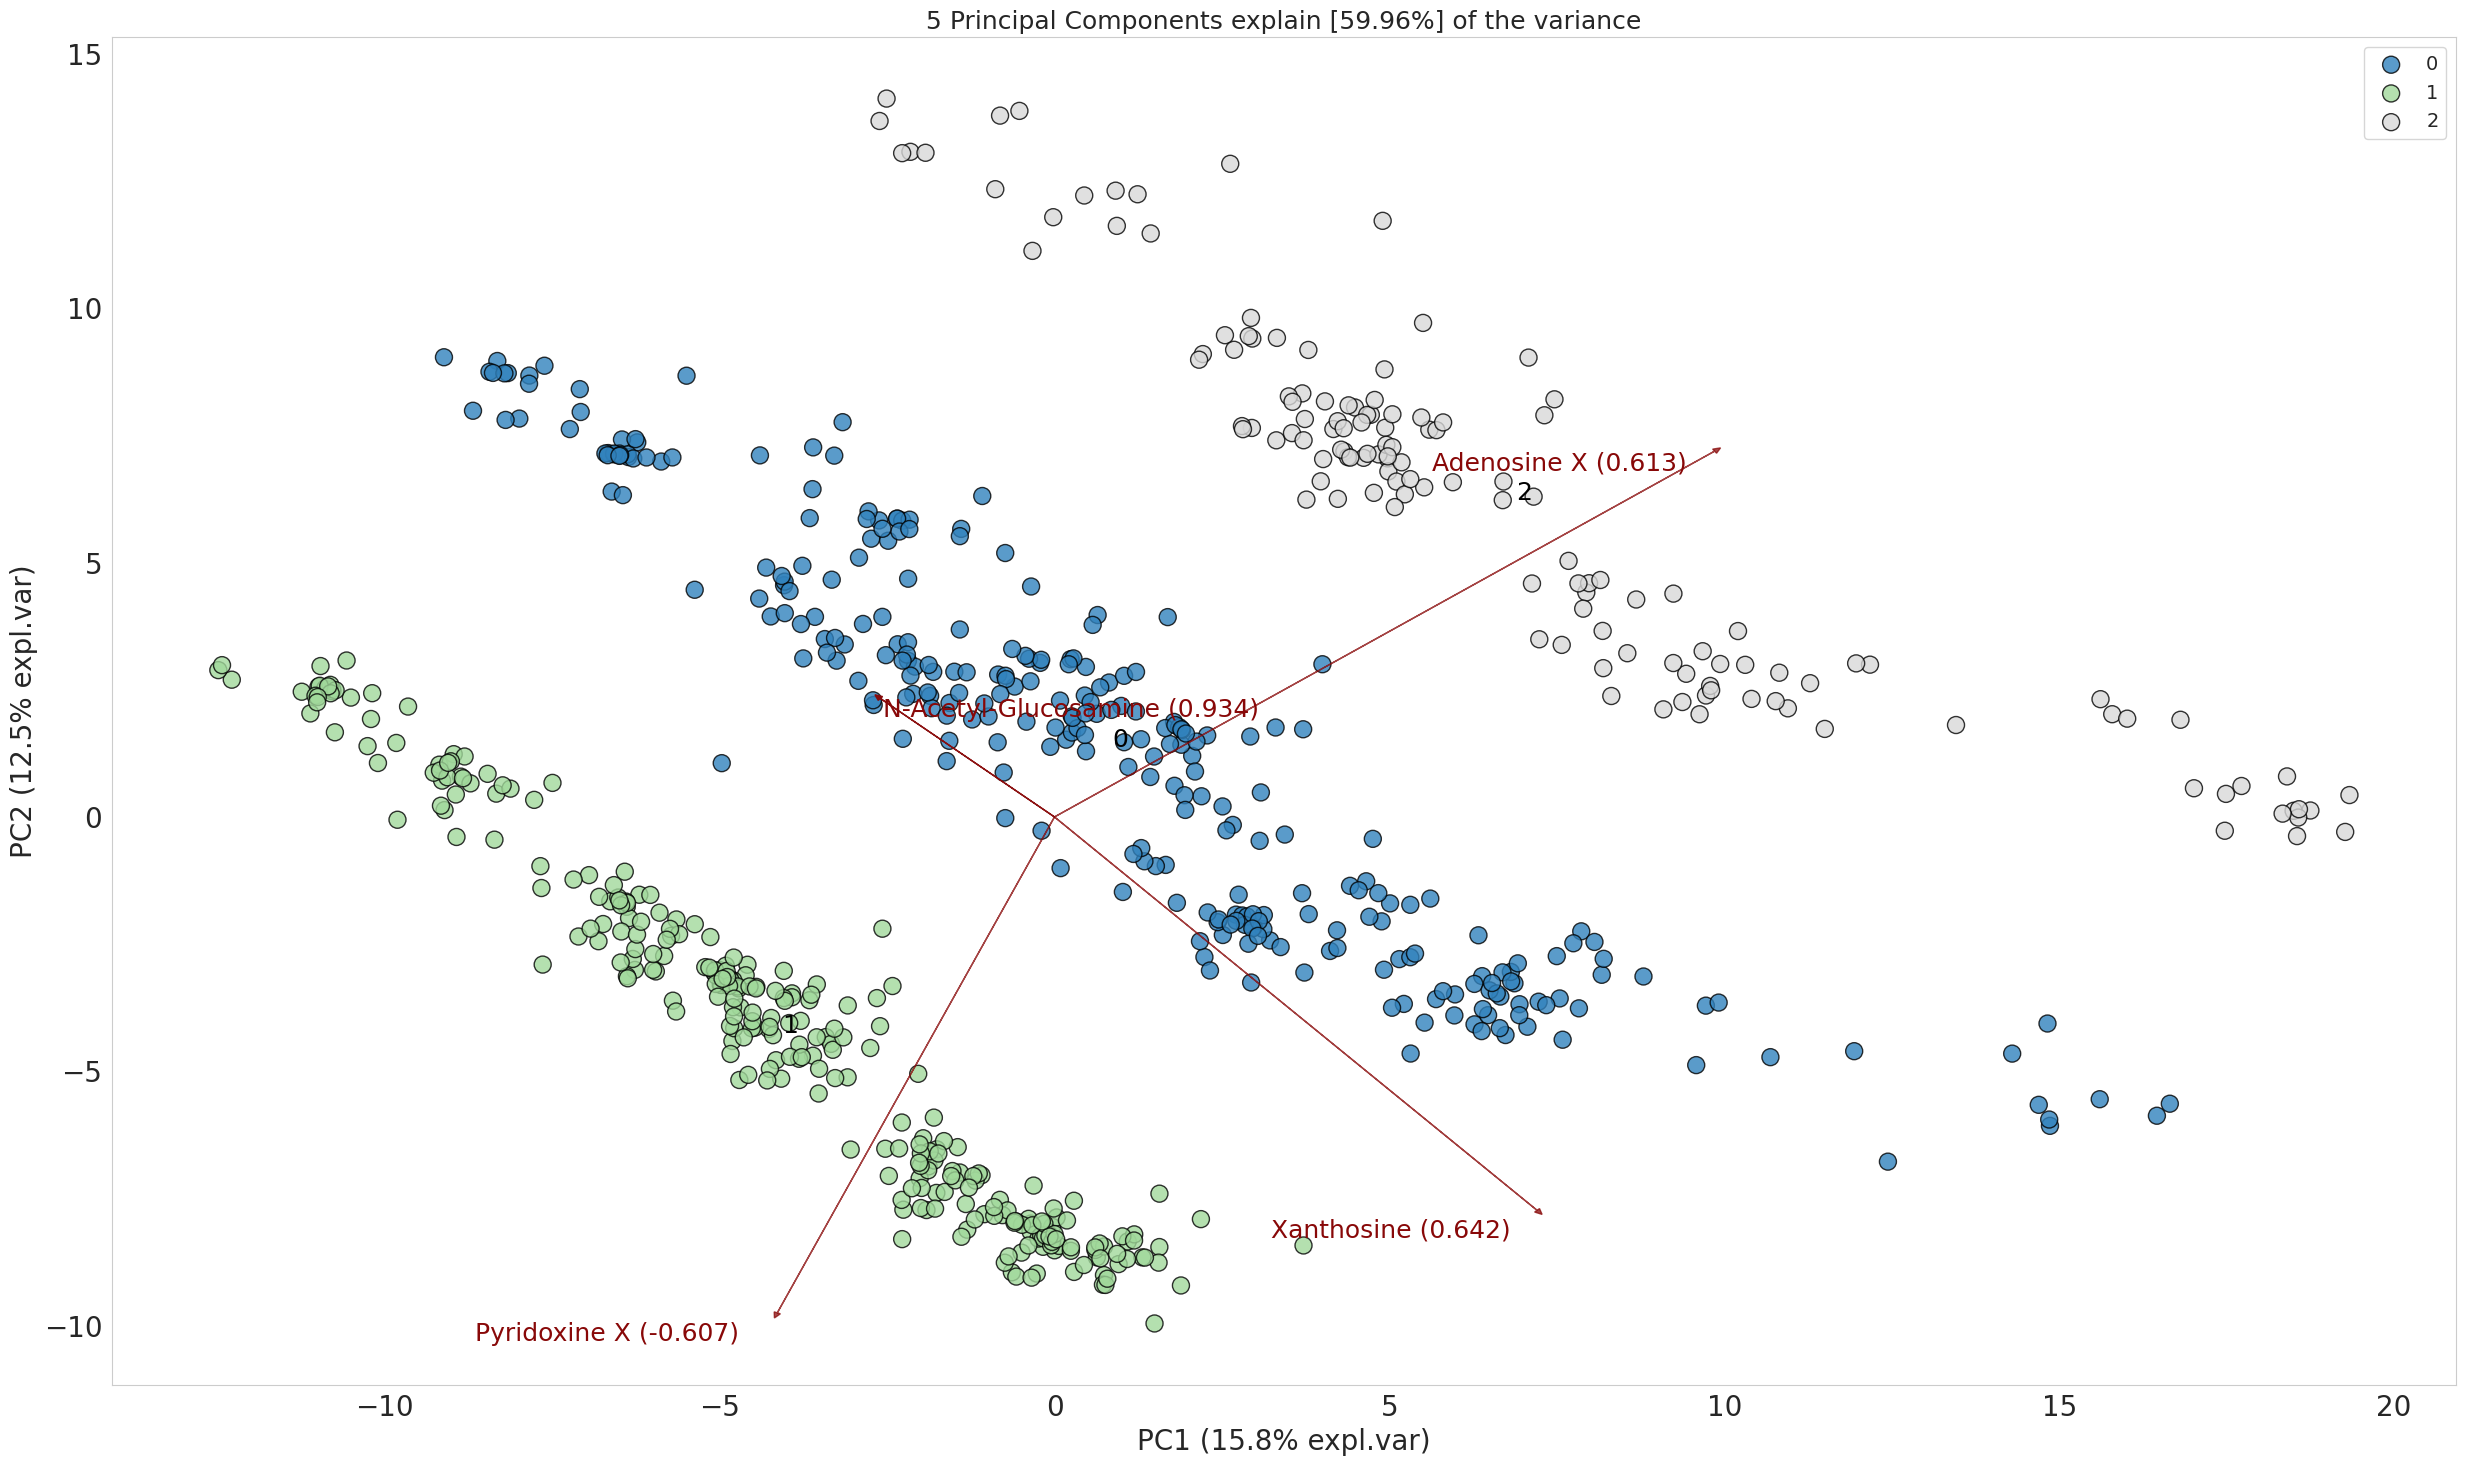

In [87]:
# Create a biplot
fig, ax = model.biplot(n_feat=4)
plt.grid(False)
plt.savefig('biplot_with_cluster.png',dpi = 500)
plt.tight_layout()
plt.show()


In [88]:
# cluster differences in output

KO['cluster'] = clustering.labels_

for cl in np.unique(KO.cluster):
    d = len(KO[KO['30D_death'] == 'True'][KO.cluster == cl])
    a = len(KO[KO['30D_death'] == 'False'][KO.cluster == cl])
    print('cluster ' + str(cl) + ': ' + str(d) + ' deaths and ' + str(a) + ' alive, fraction: ' + str( round(d/(a + d), 3 ) ))

cluster 0: 39 deaths and 172 alive, fraction: 0.185
cluster 1: 32 deaths and 193 alive, fraction: 0.142
cluster 2: 11 deaths and 74 alive, fraction: 0.129


In [29]:
# cluster vs genomics data

gd = pd.read_csv('231017-mevt__genomics_gen_presence_absence_KO.tsv', sep = '\t')
# gd.to_csv('genomics.csv')
gd = gd[gd.BI_NBR.str.contains('BI')]

toa = KO[['BI_NBR','cluster']]#[(KO.cluster == 0) | (KO.cluster == 1)]
toa.reset_index(drop = True, inplace = True)
toa = toa[toa.BI_NBR.isin(np.array(gd.BI_NBR))]
toa = toa.drop_duplicates(subset=['BI_NBR'], keep = 'first')
gd = gd[gd.BI_NBR.isin(np.array(toa.BI_NBR))]
len(toa) == len(gd)

toa.sort_values(by = 'BI_NBR', inplace = True)
gd.sort_values(by = 'BI_NBR', inplace = True)

len(toa) == len(gd)

True

In [30]:
from sklearn.feature_selection import mutual_info_regression

?mutual_info_regression

Object `mutual_info_regression` not found.


In [32]:
a, target = gd.drop(['BI_NBR'], axis = 1) , toa.drop(['BI_NBR'], axis = 1)
mi = mutual_info_regression(a, target)

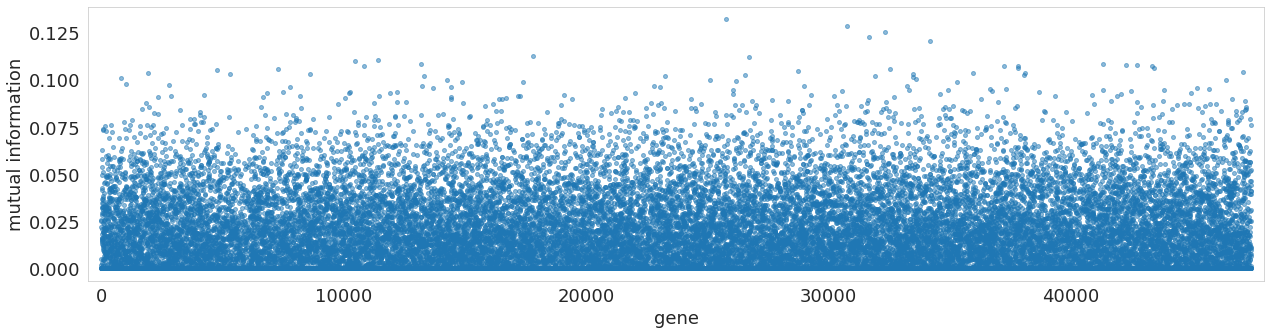

In [66]:
fig = plt.figure(figsize = (18,5))
plt.grid(False)
plt.xlim(-550, len(mi) + 550)
plt.plot(mi, 'o', alpha = 0.5, markersize = 4)
plt.ylabel('mutual information')
plt.xlabel('gene')
plt.tight_layout()
plt.savefig('manhattan plot.png', dpi = 700)

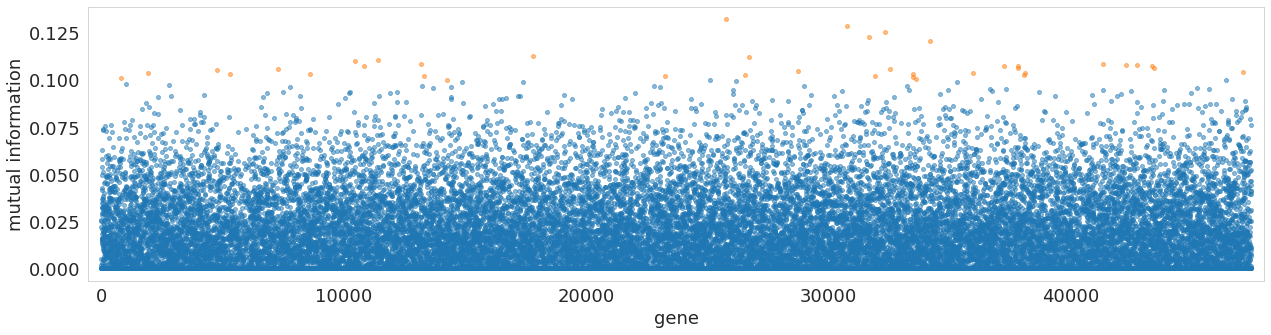

In [69]:
upper = 0.1
lower = 0.05
supper = np.ma.masked_where(mi < upper, mi)
slower = np.ma.masked_where(mi > upper, mi)
# smiddle = np.ma.masked_where((mi < lower) | (mi > upper), mi)
fig = plt.figure(figsize = (18,5))
t = range(len(mi))
plt.grid(False)
plt.xlim(-550, len(mi) + 550)
plt.plot(t,slower, 'o',  t, supper , 'o', alpha = 0.5, markersize = 4)
plt.ylabel('mutual information')
plt.xlabel('gene')
plt.tight_layout()
plt.savefig('manhattan plot divided.png', dpi = 700)